In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:51<00:00, 22.7MB/s]
100% 1.06G/1.06G [00:51<00:00, 22.2MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [5]:
#using generators

training_data = keras.utils.image_dataset_from_directory(

    directory = "/content/train",

    #for cat->0 & dog->1
    labels = "inferred",
    label_mode = "int",

    batch_size = 32,
    image_size = (256,256) #reshaping 256*256*3
)


validation_data = keras.utils.image_dataset_from_directory(

    directory = "/content/test",

    #for cat->0 & dog->1
    labels = "inferred",
    label_mode = "int",

    batch_size = 32,
    image_size = (256,256) #reshaping 256*256*3
)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
#normalize the data

def normalize(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

training_data = training_data.map(normalize)
validation_data = validation_data.map(normalize)

In [19]:
#creating CNN model

model = Sequential()

model.add(Conv2D(32, kernel_size = (3,3), padding = "valid", activation = "relu", input_shape = (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size =(2,2), strides = 2, padding = "valid"))

model.add(Conv2D(64, kernel_size = (3,3), padding = "valid", activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size =(2,2), strides = 2, padding = "valid"))

model.add(Conv2D(128, kernel_size = (3,3), padding = "valid", activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size =(2,2), strides = 2, padding = "valid"))

model.add(Flatten())

model.add(Dense(128, activation = "relu"))
model.add(Dropout(0.1))
model.add(Dense(64, activation = "relu"))
model.add(Dropout(0.1))
model.add(Dense(1, activation = "sigmoid"))

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [21]:
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [22]:
history = model.fit(training_data, validation_data = validation_data, epochs = 15)

Epoch 1/15
625/625 [==============================] - 72s 109ms/step - loss: 1.0749 - accuracy: 0.6238 - val_loss: 0.6128 - val_accuracy: 0.6484
Epoch 2/15
625/625 [==============================] - 66s 105ms/step - loss: 0.5554 - accuracy: 0.7222 - val_loss: 0.5201 - val_accuracy: 0.7420
Epoch 3/15
625/625 [==============================] - 68s 108ms/step - loss: 0.4671 - accuracy: 0.7837 - val_loss: 0.7665 - val_accuracy: 0.5164
Epoch 4/15
625/625 [==============================] - 65s 104ms/step - loss: 0.4077 - accuracy: 0.8207 - val_loss: 1.1029 - val_accuracy: 0.5912
Epoch 5/15
625/625 [==============================] - 69s 110ms/step - loss: 0.3367 - accuracy: 0.8537 - val_loss: 0.5368 - val_accuracy: 0.7724
Epoch 6/15
625/625 [==============================] - 69s 109ms/step - loss: 0.2706 - accuracy: 0.8892 - val_loss: 0.6543 - val_accuracy: 0.7590
Epoch 7/15
625/625 [==============================] - 66s 105ms/step - loss: 0.1914 - accuracy: 0.9229 - val_loss: 0.7997 - val_ac

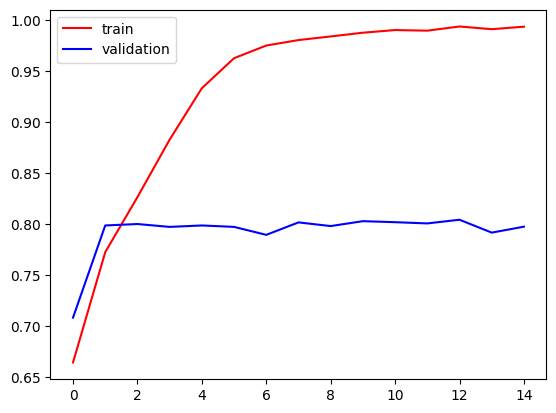

In [11]:
plt.plot(history.history["accuracy"], color = "red", label = "train")
plt.plot(history.history["val_accuracy"], color = "blue", label = "validation")
plt.legend()
plt.show()

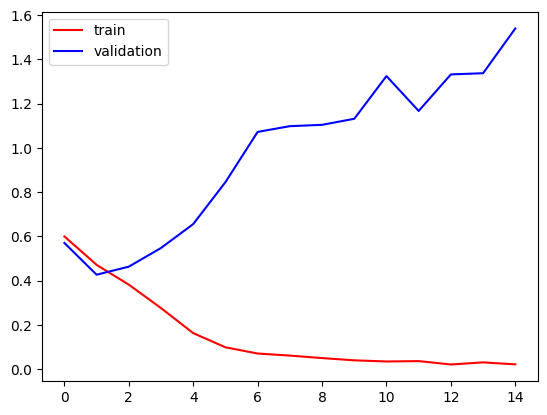

In [12]:
plt.plot(history.history["loss"], color = "red", label = "train")
plt.plot(history.history["val_loss"], color = "blue", label = "validation")
plt.legend()
plt.show()

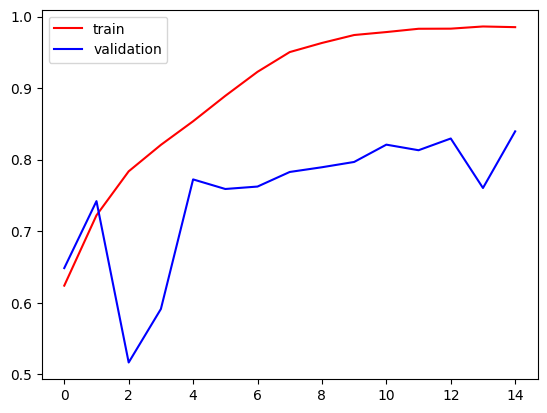

In [23]:
#after batchnormalizatio & dropout
plt.plot(history.history["accuracy"], color = "red", label = "train")
plt.plot(history.history["val_accuracy"], color = "blue", label = "validation")
plt.legend()
plt.show()

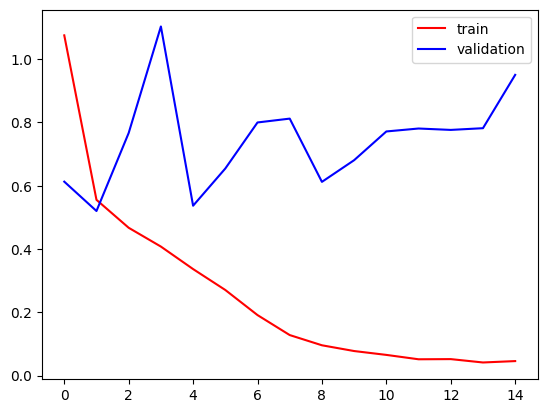

In [24]:
plt.plot(history.history["loss"], color = "red", label = "train")
plt.plot(history.history["val_loss"], color = "blue", label = "validation")
plt.legend()
plt.show()

In [25]:
import cv2

In [32]:
test_img = cv2.imread("/content/cat.jpg")

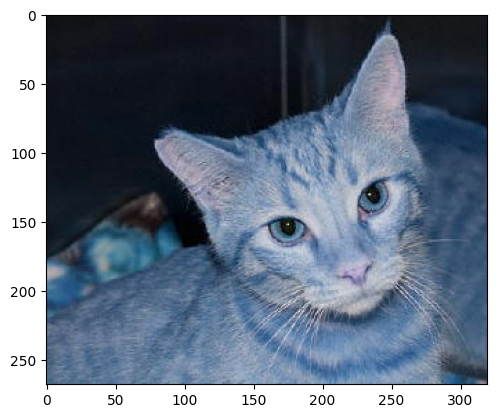

In [33]:
plt.imshow(test_img)

In [34]:
test_img.shape

(268, 320, 3)

In [35]:
test_img = cv2.resize(test_img,(256,256))

In [36]:
test_input = test_img.reshape((1,256,256,3))

In [37]:
model.predict(test_input)

1/1 [==============================] - 0s 19ms/step


array([[0.]], dtype=float32)

In [38]:
test_img = cv2.imread("/content/dog.jpg")

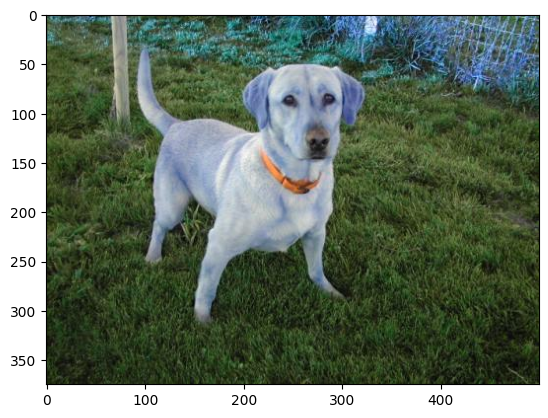

In [39]:
plt.imshow(test_img)

In [40]:
test_img.shape

(375, 500, 3)

In [41]:
test_img = cv2.resize(test_img,(256,256))

In [42]:
test_input = test_img.reshape((1,256,256,3))

In [43]:
model.predict(test_input)

1/1 [==============================] - 0s 23ms/step


array([[1.]], dtype=float32)